In [5]:
!pip install PyDrive

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

downloaded = drive.CreateFile({'id':"1wMDi6CGCkoBLKwMv1YERVGAIljXzDXxT"})   # ID of file you want to access
downloaded.GetContentFile('data.csv')


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot
from datetime import datetime, date, timedelta


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import MinMaxScaler, StandardScaler

import keras
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout
from keras.callbacks import EarlyStopping 
from keras.layers.normalization import BatchNormalization

import math


import warnings
warnings.filterwarnings("ignore")

In [7]:
df = pd.read_csv('data.csv')

In [8]:
df.head()

,Datetime,feed_flow,product_flow,feed_concentration,product_concentration,feed_temperature,stage_1_feed_pressure,product_pressure,stage_2_feed_pressure,stage_3_feed_pressure,reject_pressure,A,B,k1,k2,k3,salt_loading,recovery,salt_loading_since_replace,salt_loading_since_clean,running_time_since_clean,running_time_since_replace,feed_ph,feed_turbidity
0,2019-06-01 00:01:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,467.366667,3935.409545,7.890750,NaN
1,2019-06-01 00:02:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,467.383333,3935.426212,7.947625,NaN
2,2019-06-01 00:03:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,467.400000,3935.442878,7.890750,NaN
3,2019-06-01 00:04:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,467.416667,3935.459545,7.914375,NaN
4,2019-06-01 00:05:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,467.433333,3935.476212,7.914375,NaN


In [9]:
df['Datetime'] = pd.to_datetime(df['Datetime'])
df = df.sort_values(by ='Datetime' )
df.index = df['Datetime']

df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 527039 entries, 2019-06-01 00:01:00+00:00 to 2020-05-31 23:59:00+00:00
Data columns (total 24 columns):
 #   Column                      Non-Null Count   Dtype              
---  ------                      --------------   -----              
 0   Datetime                    527039 non-null  datetime64[ns, UTC]
 1   feed_flow                   152075 non-null  float64            
 2   product_flow                152075 non-null  float64            
 3   feed_concentration          152075 non-null  float64            
 4   product_concentration       152075 non-null  float64            
 5   feed_temperature            152075 non-null  float64            
 6   stage_1_feed_pressure       152075 non-null  float64            
 7   product_pressure            152075 non-null  float64            
 8   stage_2_feed_pressure       152075 non-null  float64            
 9   stage_3_feed_pressure       152075 non-null  float64            
 10

In [13]:

# Time-series Forecasting models and Regression models works best when the number of missings values for the features are less. 
# But almost all the features have 71% of its data missing based on the tables above.

# hence trying to extract the part of data between a date range which has few missing values.

df2 = df.loc['2020-02-15 00:00:00' : '2020-04-07 00:00:00']

# The data has few missing values only in between the date range of Feb 15th 2021 - April 7th 2021 as shown in the table below

subset = df2[['feed_flow', 'feed_concentration', 'feed_temperature', 'stage_1_feed_pressure','A']]



In [19]:

subset['feed_flow'] = subset['feed_flow'].fillna(subset['feed_flow'].mean())
subset['feed_concentration'] = subset['feed_concentration'].fillna(subset['feed_concentration'].mean())
subset['feed_temperature'] = subset['feed_temperature'].fillna(subset['feed_temperature'].mean())
subset['A'] = subset['A'].fillna(subset['A'].mean())
subset['stage_1_feed_pressure'] = subset['stage_1_feed_pressure'].fillna(subset['stage_1_feed_pressure'].mean())

In [20]:
subset = subset.reset_index(drop=True)


Epoch 1/100
328/328 - 4s - loss: 0.0547 - accuracy: 0.4807 - val_loss: 0.4487 - val_accuracy: 0.0000e+00
Epoch 2/100
328/328 - 2s - loss: 0.0019 - accuracy: 0.4807 - val_loss: 0.1829 - val_accuracy: 0.4925
Epoch 3/100
328/328 - 2s - loss: 0.0010 - accuracy: 0.4807 - val_loss: 0.0225 - val_accuracy: 0.4925
Epoch 4/100
328/328 - 2s - loss: 6.2627e-04 - accuracy: 0.4807 - val_loss: 0.0079 - val_accuracy: 0.4925
Epoch 5/100
328/328 - 2s - loss: 4.9471e-04 - accuracy: 0.4807 - val_loss: 0.0056 - val_accuracy: 0.4925
Epoch 6/100
328/328 - 2s - loss: 4.0679e-04 - accuracy: 0.4807 - val_loss: 0.0013 - val_accuracy: 0.4925
Epoch 7/100
328/328 - 2s - loss: 3.8536e-04 - accuracy: 0.4807 - val_loss: 0.0040 - val_accuracy: 0.4925
Epoch 8/100
328/328 - 2s - loss: 3.6614e-04 - accuracy: 0.4807 - val_loss: 0.0296 - val_accuracy: 0.4925
Epoch 9/100
328/328 - 2s - loss: 3.1149e-04 - accuracy: 0.4807 - val_loss: 0.0040 - val_accuracy: 0.4925
Epoch 10/100
328/328 - 2s - loss: 2.9076e-04 - accuracy: 0.4807

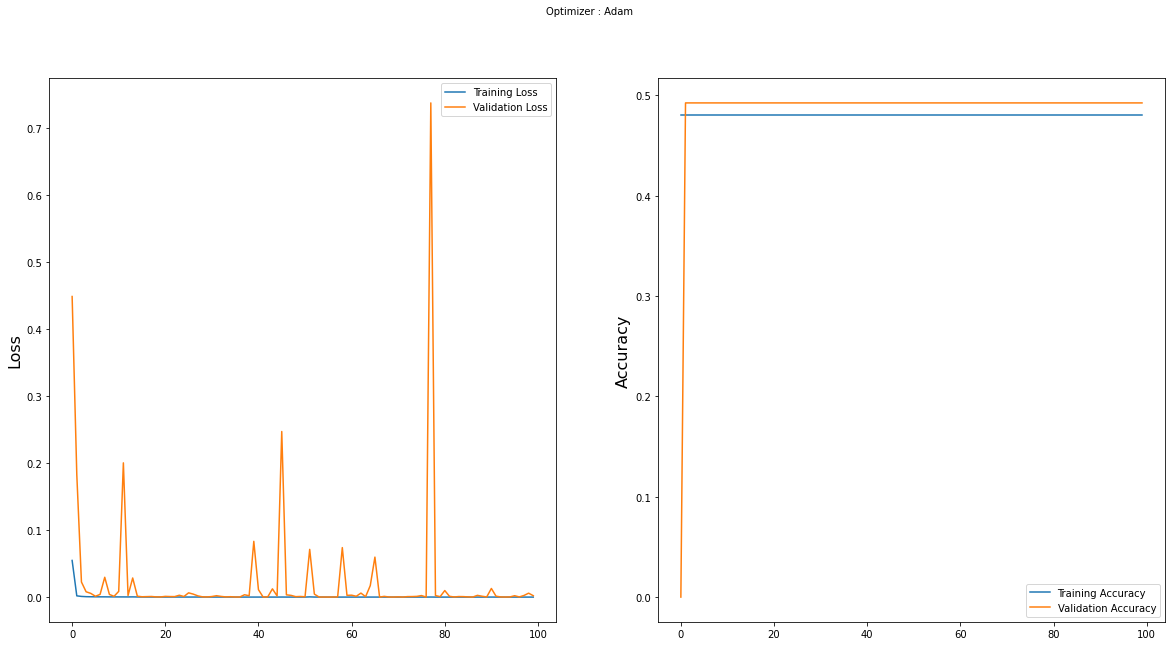

In [21]:
#reset the datetime index and removing salt loading since clean & replace features. Using General features


#First 6 features/input attributes are stored in X variable and the last 'price' response varaible is stored in Y 
X = subset.iloc[ : , 0:3 ]

#Stage_1_feed_pressure as response variable stored in Y
Y = subset.iloc[ : , 3:4 ]

#Splitting the data into training and testing data in 70:30 ratio
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42)

# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


model = Sequential()

model.add(Dense(units=256, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(units=128, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(units=64, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(units=32, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(units=16, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(units=1))


#model.compile(loss='mean_squared_logarithmic_error', optimizer='adam') 
model.compile(loss='mse',optimizer='adam',metrics=['accuracy'])

history = model.fit(X_train, Y_train, epochs=100, batch_size=128, validation_split=0.2,verbose=2,shuffle=False)

# Visualize training and validation loss plots

plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()




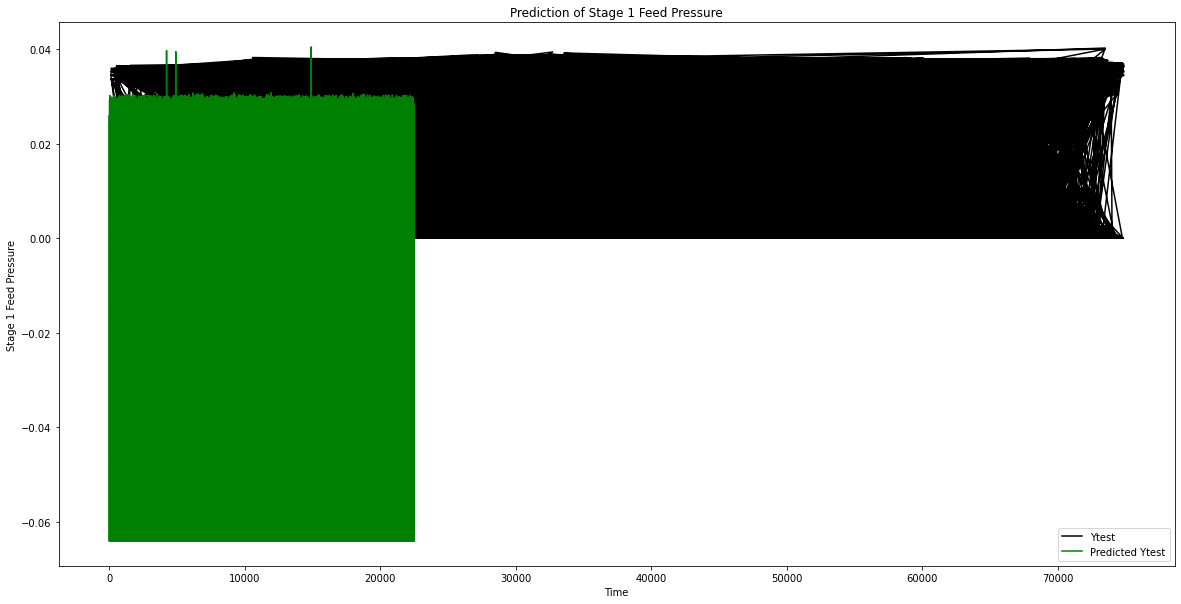

In [22]:
Y_pred = model.predict(X_test)

# %matplotlib inline
plt.figure(figsize=(20,10))
plt.plot(Y_test, color = 'black', label = 'Ytest')
plt.plot(Y_pred, color = 'green', label = 'Predicted Ytest')
plt.title('Prediction of Stage 1 Feed Pressure')
plt.xlabel('Time')
plt.ylabel('Stage 1 Feed Pressure')
plt.legend()
plt.show()